# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income

monthly_income=12000



#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#both urls work, using web page

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC

#calling the data for Bitcoin
btc_response = requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD").json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

#display data provided by API for Bitcoin
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18748687,
            "id": 1,
            "last_updated": 1625509449,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 636423910000,
                    "percent_change_1h": 0.674450751988095,
                    "percent_change_24h": -4.39143653295777,
                    "percent_change_7d": -1.88859072395254,
                    "percentage_change_1h": 0.674450751988095,
                    "percentage_change_24h": -4.39143653295777,
                    "percentage_change_7d": -1.88859072395254,
                    "price": 33954.0,
                    "volume_24h": 26720793038
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18748687,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# Using the Python requests library, make an API call to access the current price ETH

#calling the data for Ethereum
eth_response = requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=USD").json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable


#display data provided by API for Ethereum
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 116571883,
            "id": 1027,
            "last_updated": 1625509455,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 259744078007,
                    "percent_change_1h": 0.372690946902269,
                    "percent_change_24h": -5.54069600188531,
                    "percent_change_7d": 12.8995845069086,
                    "percentage_change_1h": 0.372690946902269,
                    "percentage_change_24h": -5.54069600188531,
                    "percentage_change_7d": 12.8995845069086,
                    "price": 2228.56,
                    "volume_24h": 22919409416
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 116571883,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"The current price of BTC is ${btc_price}")


The current price of BTC is $33954.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response ['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The current price of ETH is ${eth_price}")


The current price of ETH is $2228.56


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price*btc_coins

# Print current value of your holding in BTC

#added :.3f to make the value show/print 3 digits after the decimal point and make the number realistic to money format
print(f"The current value of your holding in BTC is: ${btc_value:.3f}")


The current value of your holding in BTC is: $40744.800


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price*eth_coins

# Print current value of your holding in ETH

#added :.3f to make the value show/print 3 digits after the decimal point and make the number realistic to money format
print(f"The current value of your holding in ETH is: ${eth_value:.3f}")


The current value of your holding in ETH is: $11811.368


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value+eth_value

# Print current cryptocurrency wallet balance

#added :.3f to make the value show/print 3 digits after the decimal point and make the number realistic to money format 
print(f"The total current cryptocurrency wallet balance is: ${total_crypto_wallet:.3f}")


The total current cryptocurrency wallet balance is: $52556.168


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.

#flip position of agg and spy to have constant order
spy_shares = 110
agg_shares = 200



#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key =os.getenv('ALPACA_SECRET_KEY')

#used type() to test both keys and they work
#type(alpaca_api_key)
#type(alpaca_secret_key)

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["AGG", "SPY"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()

AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2020-08-07 00:00:00-04:00  119.66  119.73  119.395  119.445  8830420  333.28   

                                                            
                             high    low   close    volume  
time                                                        
2020-08-07 00:00:00-04:00  334.88  332.3  334.55  98710236

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [30]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(df_portfolio["AGG"]["close"])

# Print the AGG closing price
print(f"AGG closing price is ${agg_close_price:.2f}")

AGG closing price is $119.44


In [32]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print the SPY closing price
print(f"SPY closing price is ${spy_close_price:.2f}")


SPY closing price is $334.55


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [33]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price*agg_shares

# Print the current value of the bond portfolio
#added $ to show that result is in dollars and 2 places after decimal poin
print(f"The current value of the bond portfolio is ${agg_value:.2f}")


The current value of the bond portfolio is $23889.00


In [34]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price*spy_shares

# Print the current value of the stock portfolio
#added $ to show that result is in dollars and 2 places after decimal point
print(f"The current value of the stock portfolio is ${spy_value:.2f}")


The current value of the stock portfolio is $36800.50


In [35]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value+spy_value

# Print the current balance of the stock and bond portion of the portfolio
# added text to show the result of the number value
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:.2f}")


The current balance of the stock and bond portion of the portfolio is $60689.50


In [36]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
# added text and 2 places after the decimal point.
print(f"The current value of the member's entire savings portfolio is ${total_portfolio:.2f}")


The current value of the member's entire savings portfolio is $113245.67


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [37]:
# Consolidate financial assets data into a Python list
saving_data=(total_crypto_wallet,total_stocks_bonds)

# Review the Python list savings_data
saving_data

(52556.16799999999, 60689.5)

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [39]:
# Create a Pandas DataFrame called savings_df 
saving_df= pd.DataFrame({
    'amount': [total_crypto_wallet,total_stocks_bonds]
})

# could also add index = ['crypto', 'stock/bond'] inside of the code above
saving_df.index = ['crypto', 'stock/bond']

# Display the savings_df DataFrame
saving_df


,amount
crypto,52556.168
stock/bond,60689.500


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

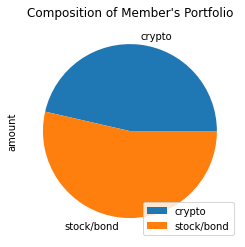

In [42]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
saving_df.plot.pie(y="amount", title="Composition of Member's Portfolio")

# added this code to move legent to bottom right as by defult was blocking crypto label
plt.legend(loc="lower right")



#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [43]:
# Create a variable named emergency_fund_value
emergency_fund_value=3*monthly_income

# print the vale of monthly income x3
print(f'The Emergency Fund Value should be ${emergency_fund_value}')


The Emergency Fund Value should be $36000


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [44]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if emergency_fund_value<total_portfolio:
    print(f"Congratulations! You have saved more than enough for your emergency fund")
    if total_portfolio == emergency_fund_value:
        print("Congratulations! You have saved enough for your emergency fund")
else:
    print(f"You are short $({emergency_fund_value-total_portfolio})")


Congratulations! You have saved more than enough for your emergency fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [45]:
# Set start and end dates of 10 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 10 years back from that date 
start_date = pd.Timestamp("2010-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

In [46]:
# Use the Alpaca get_barset function to make the API call to get the 10 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df



# Display both the first and last five rows of the DataFrame
display(df_portfolio.head())
display(df_portfolio.tail())



AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  298252778  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.16  261233795  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  302880969  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  280560712  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  211595249

AGG                                       \
                             open    high       low    close    volume   
time                                                                     
2020-08-03 00:00:00-04:00  119.37  119.40  119.1903  119.400  17837420   
2020-08-04 00:00:00-04:00  119.42  119.63  119.4200  119.630  21512268   
2020-08-05 00:00:00-04:00  119.39  119.49  119.3100  119.400  34175883   
2020-08-06 00:00:00-04:00  119.62  119.73  119.5300  119.580   9009216   
2020-08-07 00:00:00-04:00  119.66  119.73  119.3950  119.445   8830420   

                                SPY                                    
                               open    high     low   close    volume  
time                                                                   
2020-08-03 00:00:00-04:00  328.3200  329.62  327.73  328.76  71741125  
2020-08-04 00:00:00-04:00  327.8600  330.06  327.86  330.03  73684427  
2020-08-05 00:00:00-04:00  331.4700  332.39  331.18  332.06  72846458  
2020-08-06 00:00:00-04:00  331.4799  334.46  331.13  334.31  76900649  
2020-08-07 00:00:00-04:00  333.2800  334.88  332.30  334.55  98710236

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [47]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.

# ?MCSimulation used to check the parameters

mc_thirty = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
mc_thirty.portfolio_data


AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.330  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.970  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.490  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.550  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.290  18141498   
...                           ...       ...       ...      ...       ...   
2020-08-03 00:00:00-04:00  119.37  119.4000  119.1903  119.400  17837420   
2020-08-04 00:00:00-04:00  119.42  119.6300  119.4200  119.630  21512268   
2020-08-05 00:00:00-04:00  119.39  119.4900  119.3100  119.400  34175883   
2020-08-06 00:00:00-04:00  119.62  119.7300  119.5300  119.580   9009216   
2020-08-07 00:00:00-04:00  119.66  119.7300  119.3950  119.445   8830420   

                                             SPY                            \
                          daily_return      open      high     low   close   
time                                                                         
2020-03-18 00:00:00-04:00          NaN  236.2500  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.2500  247.3800  232.22  241.16   
2020-03-20 00:00:00-04:00     0.004772  242.5300  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.1900  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.4200  244.1000  233.80  243.59   
...                                ...       ...       ...     ...     ...   
2020-08-03 00:00:00-04:00    -0.001338  328.3200  329.6200  327.73  328.76   
2020-08-04 00:00:00-04:00     0.001926  327.8600  330.0600  327.86  330.03   
2020-08-05 00:00:00-04:00    -0.001923  331.4700  332.3900  331.18  332.06   
2020-08-06 00:00:00-04:00     0.001508  331.4799  334.4600  331.13  334.31   
2020-08-07 00:00:00-04:00    -0.001129  333.2800  334.8800  332.30  334.55   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  298252778          NaN  
2020-03-19 00:00:00-04:00  261233795     0.000622  
2020-03-20 00:00:00-04:00  302880969    -0.050672  
2020-03-23 00:00:00-04:00  280560712    -0.028086  
2020-03-24 00:00:00-04:00  211595249     0.094737  
...                              ...          ...  
2020-08-03 00:00:00-04:00   71741125     0.006768  
2020-08-04 00:00:00-04:00   73684427     0.003863  
2020-08-05 00:00:00-04:00   72846458     0.006151  
2020-08-06 00:00:00-04:00   76900649     0.006776  
2020-08-07 00:00:00-04:00   98710236     0.000718  

[100 rows x 12 columns]

In [49]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.008858e+00,1.004284e+00,9.979326e-01,1.001128e+00,9.933033e-01,1.018838e+00,1.008166e+00,9.731405e-01,1.021978e+00,1.000985e+00,...,1.001557e+00,9.973084e-01,9.825852e-01,1.002729e+00,9.935443e-01,1.020998e+00,9.996554e-01,1.006236e+00,9.978608e-01,1.013334e+00
2,1.020997e+00,1.006386e+00,1.000542e+00,9.846410e-01,9.738767e-01,1.024579e+00,1.047285e+00,9.811863e-01,1.028038e+00,1.011292e+00,...,9.997432e-01,1.003432e+00,9.992644e-01,1.026154e+00,1.008258e+00,1.021557e+00,9.921124e-01,1.013871e+00,1.015073e+00,1.011507e+00
3,1.035985e+00,9.982374e-01,9.940363e-01,1.005630e+00,9.695393e-01,1.022938e+00,1.057598e+00,9.827211e-01,1.042766e+00,1.010865e+00,...,9.943063e-01,9.904447e-01,9.690460e-01,1.025372e+00,1.009066e+00,1.031521e+00,1.016634e+00,1.051986e+00,1.031675e+00,1.010700e+00
4,1.051231e+00,1.008028e+00,9.839053e-01,1.026786e+00,9.606835e-01,9.915685e-01,1.055764e+00,9.819957e-01,1.032479e+00,1.036987e+00,...,1.021738e+00,1.020122e+00,9.686555e-01,1.012589e+00,1.028249e+00,1.031622e+00,9.992210e-01,1.058573e+00,1.021458e+00,1.020514e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.403573e+07,2.628525e+08,3.587149e+08,1.511732e+08,8.598972e+07,5.700345e+07,5.354219e+08,2.838201e+08,1.736835e+08,2.010339e+08,...,3.823464e+08,1.656108e+08,9.819033e+07,5.050331e+08,1.608574e+08,4.023130e+08,1.875829e+08,2.696930e+08,3.907226e+07,6.479156e+08
7557,9.180630e+07,2.626357e+08,3.559767e+08,1.520924e+08,8.488871e+07,5.952036e+07,5.349090e+08,2.838641e+08,1.734554e+08,1.984573e+08,...,3.804414e+08,1.640532e+08,9.890781e+07,4.943295e+08,1.627036e+08,4.054553e+08,1.899806e+08,2.684401e+08,3.859536e+07,6.512297e+08
7558,9.350789e+07,2.648572e+08,3.606062e+08,1.501986e+08,8.507601e+07,6.023123e+07,5.356670e+08,2.902647e+08,1.743251e+08,2.015627e+08,...,3.807920e+08,1.621374e+08,9.959827e+07,4.920295e+08,1.654385e+08,3.984066e+08,1.857561e+08,2.682791e+08,3.891220e+07,6.530649e+08
7559,9.394253e+07,2.678530e+08,3.625140e+08,1.521247e+08,8.599073e+07,6.175929e+07,5.310362e+08,2.896431e+08,1.746293e+08,2.018754e+08,...,3.811873e+08,1.669185e+08,9.709387e+07,4.903537e+08,1.635482e+08,3.974258e+08,1.839523e+08,2.611332e+08,3.902290e+07,6.584819e+08


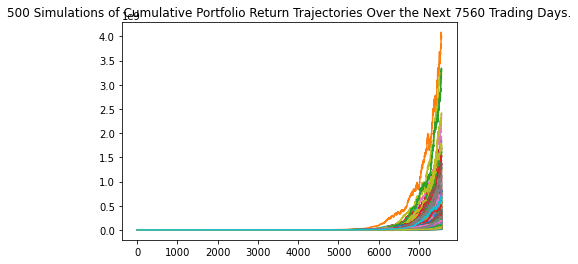

In [50]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# Plot simulation outcomes
mc_sim_line_plot = mc_thirty.plot_simulation()

# Save the plot for future use
mc_sim_line_plot.get_figure().savefig("mc_thirty_sim_plot.png", bbox_inches="tight")

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

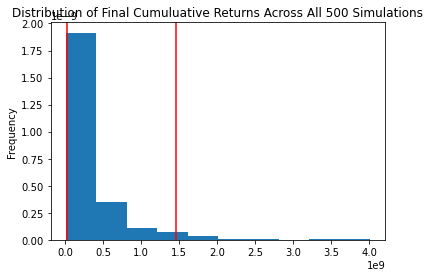

In [51]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram

# Plot probability distribution and confidence intervals
mc_sim_dist_plot = mc_thirty.plot_distribution()

# Save the plot for future use
mc_sim_dist_plot.get_figure().savefig('mc_thirty_dist_plot.png',bbox_inches='tight')

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [52]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable

mc_summary_statistics = mc_thirty.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(mc_summary_statistics)

count           5.000000e+02
mean            3.344106e+08
std             4.431584e+08
min             1.170283e+07
25%             9.384706e+07
50%             1.766880e+08
75%             3.954350e+08
max             4.012665e+09
95% CI Lower    2.445061e+07
95% CI Upper    1.459343e+09
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [55]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:.2f}")


The current balance of the stock and bond portion of the portfolio is $60689.50


In [56]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = mc_summary_statistics[8] 
ci_upper_thirty_cumulative_return = mc_summary_statistics[9]

# Print the result of your calculations
range_stock_bond=ci_upper_thirty_cumulative_return- ci_lower_thirty_cumulative_return
print(f"The range is {range_stock_bond:.2f}")

The range is 1434892602.61


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [72]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.

# created mc_ten to identify the simulatioin for 10 years
mc_ten = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
mc_ten.portfolio_data



AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.330  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.970  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.490  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.550  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.290  18141498   
...                           ...       ...       ...      ...       ...   
2020-08-03 00:00:00-04:00  119.37  119.4000  119.1903  119.400  17837420   
2020-08-04 00:00:00-04:00  119.42  119.6300  119.4200  119.630  21512268   
2020-08-05 00:00:00-04:00  119.39  119.4900  119.3100  119.400  34175883   
2020-08-06 00:00:00-04:00  119.62  119.7300  119.5300  119.580   9009216   
2020-08-07 00:00:00-04:00  119.66  119.7300  119.3950  119.445   8830420   

                                             SPY                            \
                          daily_return      open      high     low   close   
time                                                                         
2020-03-18 00:00:00-04:00          NaN  236.2500  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.2500  247.3800  232.22  241.16   
2020-03-20 00:00:00-04:00     0.004772  242.5300  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.1900  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.4200  244.1000  233.80  243.59   
...                                ...       ...       ...     ...     ...   
2020-08-03 00:00:00-04:00    -0.001338  328.3200  329.6200  327.73  328.76   
2020-08-04 00:00:00-04:00     0.001926  327.8600  330.0600  327.86  330.03   
2020-08-05 00:00:00-04:00    -0.001923  331.4700  332.3900  331.18  332.06   
2020-08-06 00:00:00-04:00     0.001508  331.4799  334.4600  331.13  334.31   
2020-08-07 00:00:00-04:00    -0.001129  333.2800  334.8800  332.30  334.55   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  298252778          NaN  
2020-03-19 00:00:00-04:00  261233795     0.000622  
2020-03-20 00:00:00-04:00  302880969    -0.050672  
2020-03-23 00:00:00-04:00  280560712    -0.028086  
2020-03-24 00:00:00-04:00  211595249     0.094737  
...                              ...          ...  
2020-08-03 00:00:00-04:00   71741125     0.006768  
2020-08-04 00:00:00-04:00   73684427     0.003863  
2020-08-05 00:00:00-04:00   72846458     0.006151  
2020-08-06 00:00:00-04:00   76900649     0.006776  
2020-08-07 00:00:00-04:00   98710236     0.000718  

[100 rows x 12 columns]

In [73]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009510,0.994980,0.992692,1.020401,1.031167,0.990543,1.005720,1.010578,0.997080,0.993560,...,1.022662,0.997291,1.013930,0.998057,1.004798,1.017262,1.003498,0.985639,1.000218,1.012560
2,1.021390,1.017600,0.980156,1.004949,1.004511,1.017268,1.028436,1.002010,0.995293,1.004629,...,1.034626,1.014011,1.020012,1.000153,1.017060,1.026989,1.001093,0.974205,0.985636,0.993741
3,1.039736,1.011974,0.975328,1.055221,0.986821,0.983403,1.052333,1.018635,0.981681,1.044897,...,1.034283,1.023800,1.031160,0.996644,0.988340,1.019649,1.011776,0.971163,0.991671,1.009835
4,1.056770,1.032776,0.985034,1.017530,0.998958,1.011170,1.064071,1.040604,0.968296,1.028225,...,1.055919,1.048151,1.023947,0.995215,0.989990,1.018960,1.010426,0.958053,0.991585,1.043739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1038.763233,3786.961881,9080.275473,362.429994,1459.630251,1357.464177,718.198312,1114.167439,443.176247,1156.757666,...,1499.914751,2415.020227,1127.457002,4091.496721,1342.311331,1725.877545,1211.459452,375.182244,782.086057,2020.312650
2517,1041.508917,3747.596523,9012.880850,360.555959,1458.243985,1370.350830,723.901023,1127.204816,436.050153,1192.400799,...,1490.867139,2436.580527,1136.971100,4095.437743,1341.352473,1685.460477,1232.347557,387.201297,790.991142,2029.053689
2518,1043.911302,3747.244493,8992.436625,355.639898,1469.280482,1399.123772,708.062558,1151.811226,432.885881,1195.302221,...,1474.310020,2517.135893,1120.658554,4163.458252,1349.132749,1672.806746,1271.455796,392.272744,784.741117,2019.867410
2519,1066.701037,3696.150103,9054.342205,364.191468,1472.364792,1416.540999,707.110456,1164.540914,428.392298,1213.778274,...,1503.717766,2483.684552,1102.708027,4370.200243,1330.982483,1736.214648,1280.609391,395.772160,762.547623,2042.916371


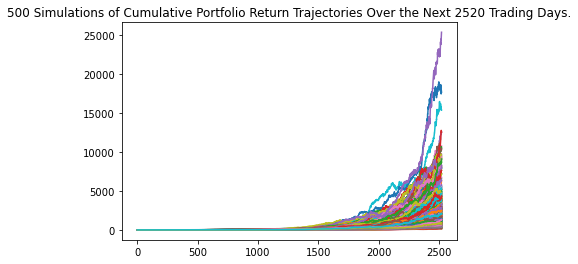

In [74]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot

# created mc_sim_line_plot_ten to identify the simulatioin for 10 years
mc_sim_line_plot_ten = mc_ten.plot_simulation()

# Save the plot for future use
mc_sim_line_plot_ten.get_figure().savefig("mc_ten_sim_plot.png", bbox_inches="tight")


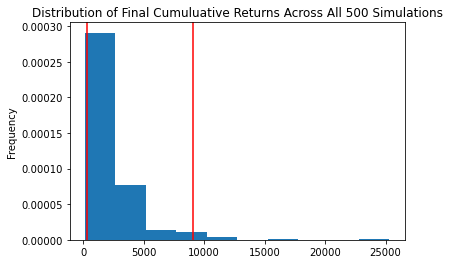

In [75]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram

# Plot probability distribution and confidence intervals
mc_sim_line_plot_ten = mc_ten.plot_distribution()

# Save the plot for future use
mc_sim_line_plot_ten.get_figure().savefig('mc_ten_dist_plot.png',bbox_inches='tight')

In [76]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable

# created mc_summary_statistics_ten to identify the simulatioin for 10 years
mc_summary_statistics_ten = mc_ten.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(mc_summary_statistics_ten)

count             500.000000
mean             2291.082395
std              2417.008500
min               148.413337
25%               915.877004
50%              1549.833873
75%              2772.110885
max             25310.665623
95% CI Lower      332.674965
95% CI Upper     9048.354254
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [77]:
# Print the current balance of the stock and bond portion of the members portfolio

print(f"The balance of the stock and bond portfolio is ${total_stocks_bonds:.2f}")



The balance of the stock and bond portfolio is $60689.50


In [78]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = mc_summary_statistics_ten[8] 
ci_upper_ten_cumulative_return = mc_summary_statistics_ten[9]

# Print the result of your calculations
range_stock_bond_ten=ci_upper_ten_cumulative_return- ci_lower_ten_cumulative_return
print(f"The range is {range_stock_bond_ten:.2f}")


The range is 8715.68


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?